In [1]:
%matplotlib inline
import pandas as pd
import sqlalchemy

In [14]:
engine = sqlalchemy.create_engine('postgresql://bunkas01:@localhost/movies')

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [27]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [16]:
release_dates = pd.read_sql('release_date', engine)
release_dates.head(5)

,title,year,country,date,month,day,dow
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,6,15,4
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05,11,5,3
2,#Beings,2015,Romania,2015-01-29,1,29,3
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21,1,21,2
4,#Horror,2015,USA,2015-11-20,11,20,4
5,#Lucky Number,2015,USA,2015-09-01,9,1,1
6,#Nerealnaya lyubov,2014,Russia,2014-02-13,2,13,3
7,#Stuck,2014,Turkey,2014-07-01,7,1,1
8,#Stuck,2014,USA,2014-10-10,10,10,4
9,#Y,2014,Philippines,2014-12-10,12,10,2


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

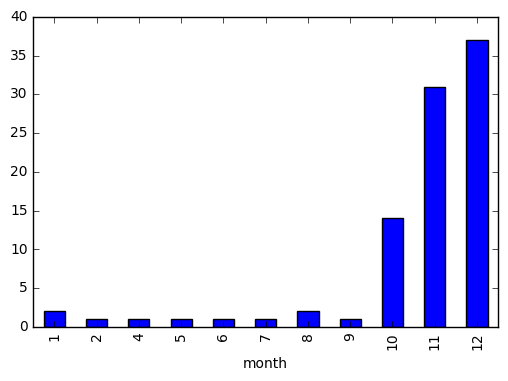

In [22]:
release_dates[release_dates['title'].str.contains('Christmas')].query("country == 'USA'").groupby('month')\
.size().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

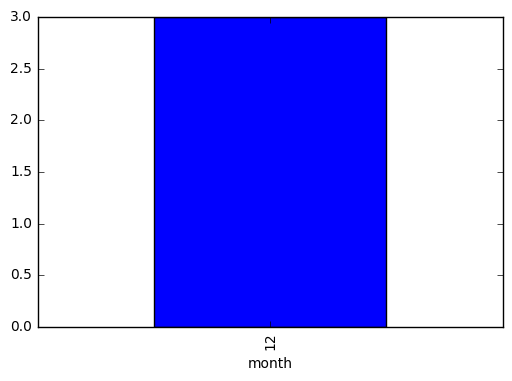

In [23]:
release_dates[release_dates['title'].str.contains('The Hobbit')].query("country == 'USA'").groupby('month')\
.size().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

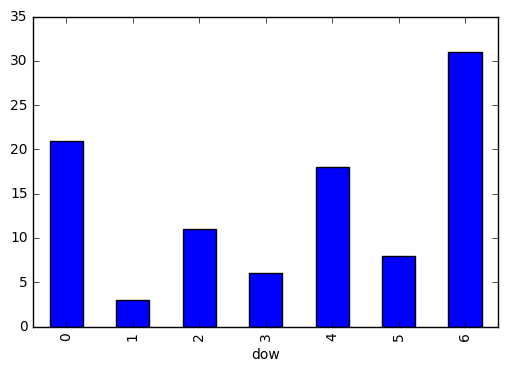

In [24]:
release_dates[release_dates['title'].str.contains('Romance')].query("country == 'USA'").groupby('dow')\
.size().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

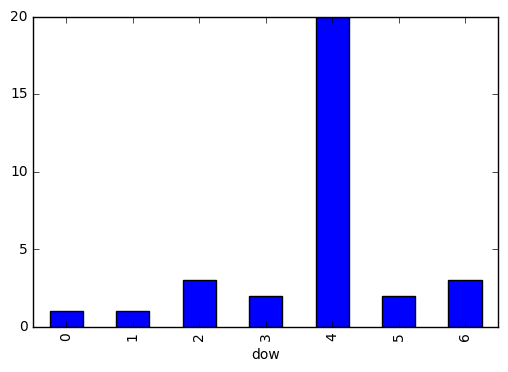

In [25]:
release_dates[release_dates['title'].str.contains('Action')].query("country == 'USA'").groupby('dow')\
.size().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [36]:
cast.query("name == 'Judi Dench' & year >= 1990 & year < 2000").merge(release_dates.query("year >= 1990 & year < 2000"),\
                                                                      how='left', on=['title'])\
.query("country == 'USA'")[['title', 'name', 'date']]

,title,name,date
1,GoldenEye,Judi Dench,1995-11-17
40,Hamlet,Judi Dench,1991-01-18
56,Hamlet,Judi Dench,1996-12-25
86,Jack & Sarah,Judi Dench,1996-03-22
91,Mrs Brown,Judi Dench,1997-07-18
115,Shakespeare in Love,Judi Dench,1999-01-08
161,Tea with Mussolini,Judi Dench,1999-05-14
187,The World Is Not Enough,Judi Dench,1999-11-19
260,Tomorrow Never Dies,Judi Dench,1997-12-19


### In which months do films with Judi Dench tend to be released in the USA?

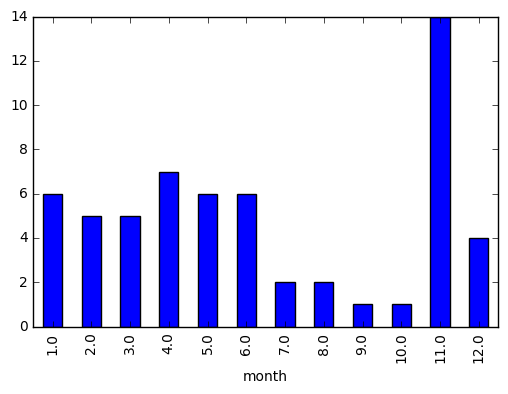

In [42]:
cast.query("name == 'Judi Dench'").merge(release_dates, how='left', on=['title']).query("country == 'USA'")\
.groupby('month').size().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

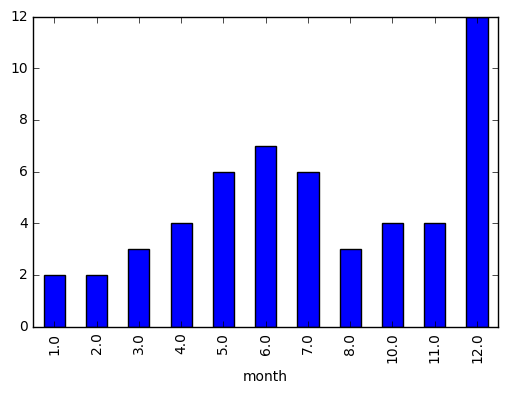

In [43]:
cast.query("name == 'Tom Cruise'").merge(release_dates, how='left', on=['title']).query("country == 'USA'")\
.groupby('month').size().plot(kind='bar')